In [1]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time
sys.path.append(sys.path[0] + '/..')

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

In [2]:
# load data
jhu_data     = cdc.CoronaData(download_data = True)


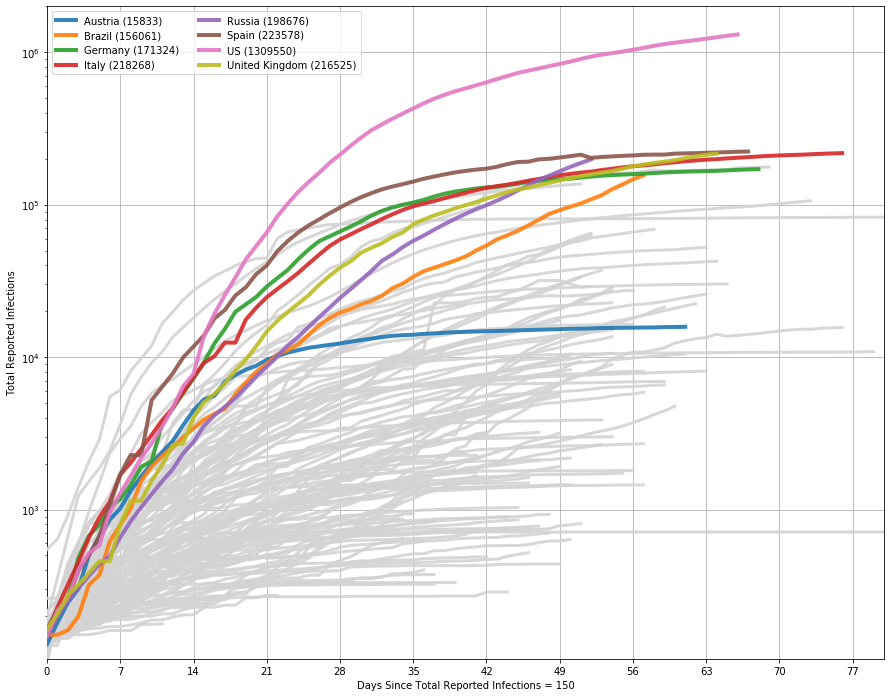

In [3]:
threshold  = 150

colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(jhu_data))
fig, ax          = plt.subplots()
scidx            = 0

specialcountries = ['Austria','Italy','Germany','Spain','US', 'United Kingdom', 'Russia', 'Brazil']

for country,countrydata in jhu_data:
    totinf = np.nan_to_num(countrydata['Confirmed'])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(totinf[-1])
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

plt.legend(ncol = 2)
plt.xlim([0,80])
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.ylim([threshold*.7,2e6])
plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.yscale('log')
plt.grid()
plt.show()

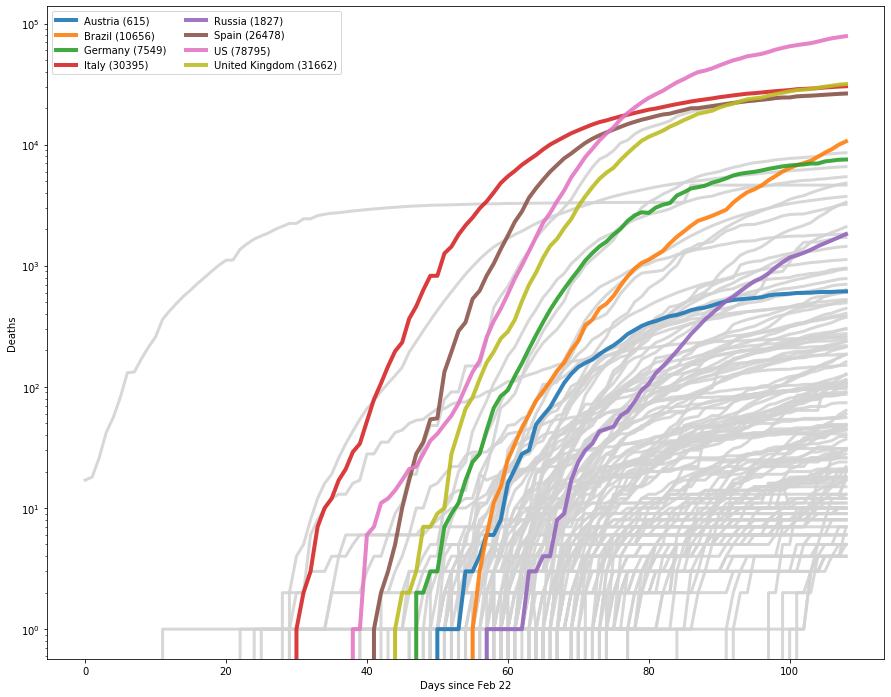

In [4]:
scidx = 0
lgnd = []
fig, ax          = plt.subplots()
dthreshold  = 3
for country,countrydata in jhu_data:
    deaths = np.nan_to_num(countrydata['Deaths'])
    if deaths[-1] > dthreshold:
        lgnd.append(country + ' ({:.0f})'.format(deaths[-1]))
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(deaths[-1])
        ax.plot(deaths, c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

plt.legend(ncol = 2)
plt.yscale('log')
plt.xlabel(r'Days since Feb 22')
plt.ylabel(r'Deaths')
plt.show()

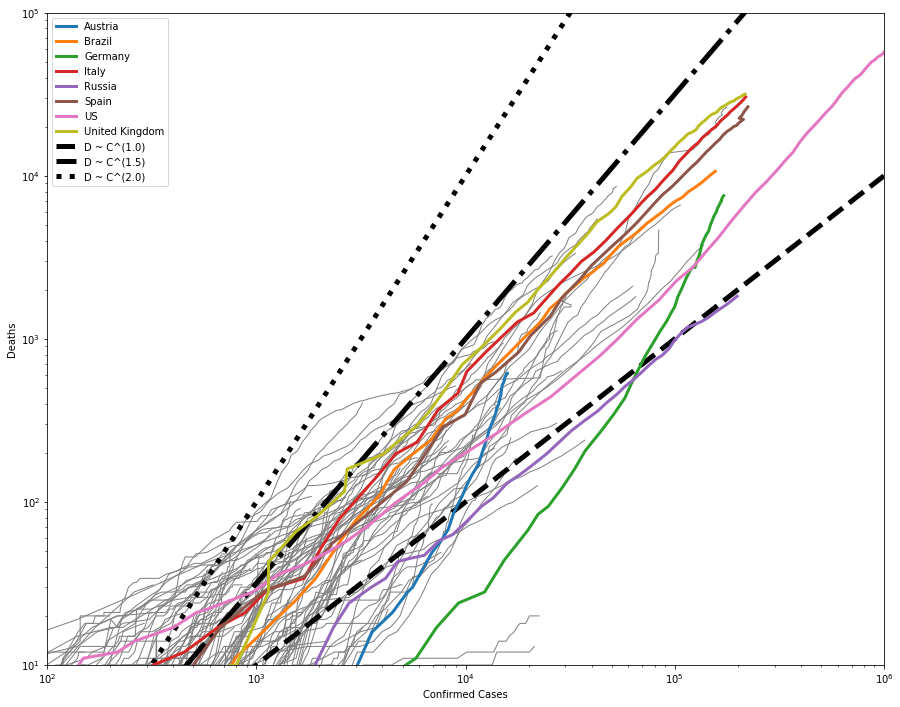

In [5]:
i = 0
for country, cdata in jhu_data:
    c = 'gray'
    lw = 1
    zorder = 1
    label = ''
    if country in specialcountries:
        c = colornames[i % len(colornames)]
        lw = 3
        zorder = 100 + i
        label = country
        i+=1
    plt.plot(cdata['Confirmed'],cdata['Deaths'],c = c, lw = lw, zorder = zorder,label = label)

x = np.linspace(1,6,num = 30)    
plt.plot(10**x,10**(1.0*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(1.0)', c = 'black', linestyle = '--')
plt.plot(10**x,10**(1.5*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(1.5)', c = 'black', linestyle = '-.')
plt.plot(10**x,10**(2.0*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(2.0)', c = 'black', linestyle = ':')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2,1e6])
plt.ylim([1e1,1e5])
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.savefig('confirmed_vs_deaths.pdf')

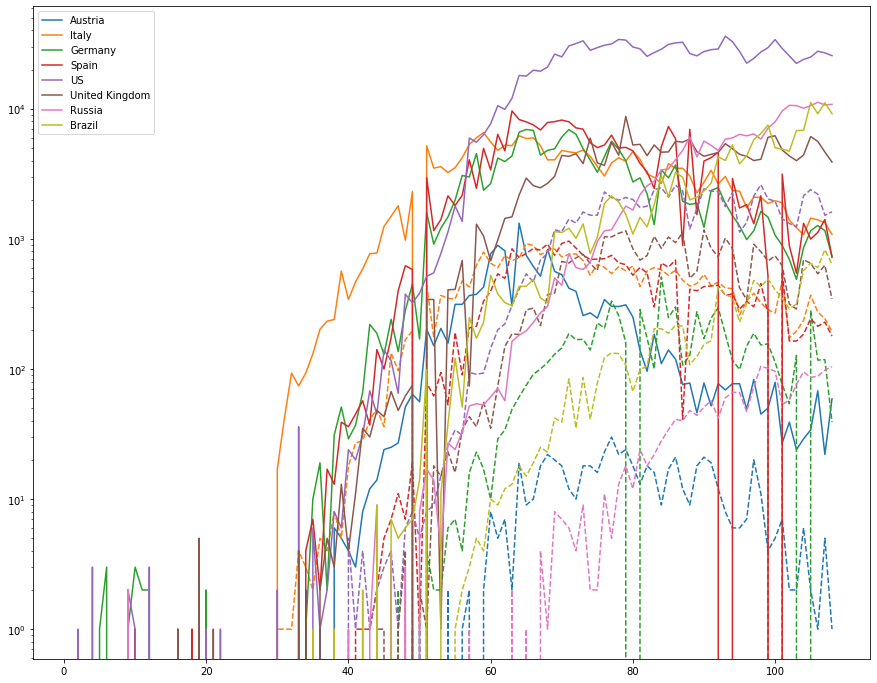

In [8]:
for i,country in enumerate(specialcountries):
    plt.plot(jhu_data.CountryData(country)['Confirmed'].diff().values,c = colornames[i%len(colornames)],label = country)
    plt.plot(jhu_data.CountryData(country)['Deaths'].diff().values,c = colornames[i%len(colornames)],linestyle = '--')
plt.legend()
plt.yscale('log')
plt.show()